# Explore here

In [51]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import train_test_split
# Importar Data

url = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'
data_total = pd.read_csv(url)
data_total.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
# Almacenerla localmente

data_total.to_csv('/workspaces/Gonz3092-EDA-proyecto-4geeks/data/raw/data_total.csv')

In [6]:
# Obtener dimensiones

data_total.shape

(48895, 16)

In [7]:
# Info sobre el tipo de datos

data_total.info() 

# 8 variables numericas (latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count) 
# 8 categoricas (id, name, host_id, host_name, neighbourhood_group, neighbourhood, room_type, availability_365)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
print(f"El numero de nombres duplicado es: {data_total['name'].duplicated().sum()}") # Puede haber nombres de publicaciones dulicados
print(f"La cantidad de host_id duplicados son: {data_total['host_id'].duplicated().sum()}") # El mismo dueño puede tener varias casa
print(f"El numero de ID_records duplicados es: {data_total['id'].duplicated().sum()}") # No hay duplicados, por lo que todos los registros deben ser unicos


El numero de nombres duplicado es: 989
La cantidad de host_id duplicados son: 11438
El numero de ID_records duplicados es: 0


In [9]:
# Eliminar data irrelevante

data_total.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
data_total.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [10]:
data_total.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 4.1+ MB


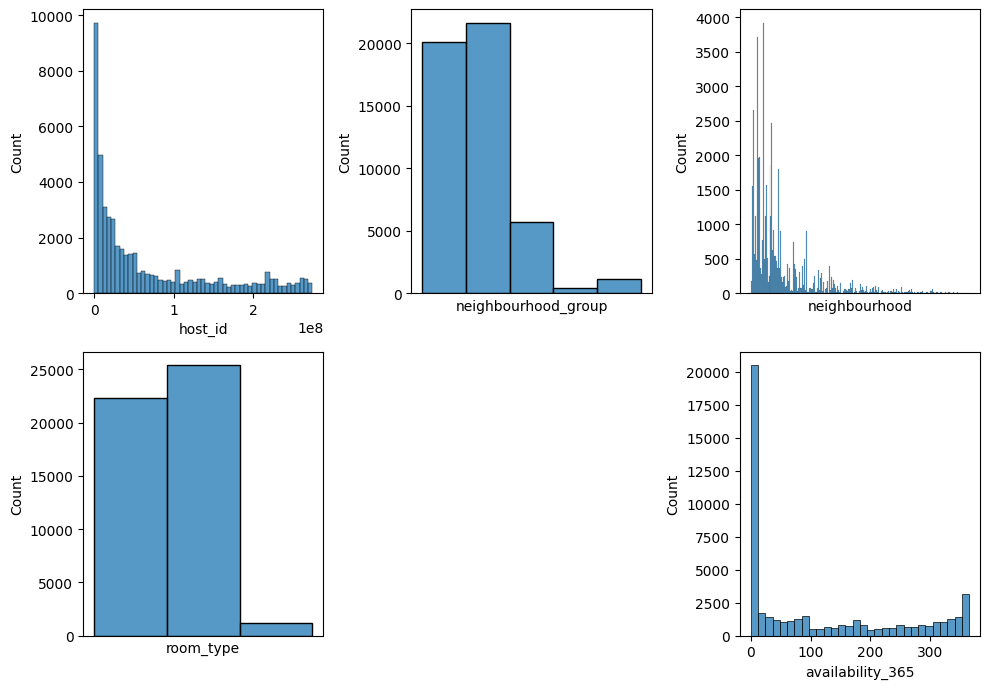

In [11]:
# Análisis de variables univariante

# Variables Categoricas: host_id, neighbourhood_group, neighbourhood, room_type, availability_365

fig, axis = plt.subplots(2, 3, figsize=(10, 7))

sns.histplot(ax=axis[0, 0], data=data_total, x="host_id")
sns.histplot(ax=axis[0, 1], data=data_total, x="neighbourhood_group").set_xticks([])
sns.histplot(ax=axis[0, 2], data=data_total, x="neighbourhood").set_xticks([])
sns.histplot(ax=axis[1, 0], data=data_total, x="room_type").set_xticks([])
sns.histplot(ax=axis[1, 2], data=data_total, x="availability_365")

# Eliminar el eje vacío en la posición [1, 1]
fig.delaxes(axis[1, 1]) if axis[1, 1] else None

plt.tight_layout()
plt.show()

- Hay muchos Host Id con multiples propiedades, pero lo que mas hay es valores nulos en este valor
- Hay 5 Barrios en el dataset (Brooklyn, Manhattan, Queens, Staten Island y el Bronx), lo cual confirma que estamos analizando NYC
- Hay ciertos vecindarios que concentran una mayor cantidad de propiedades
- El tipo de Habitacion que predomina es Casa/Departamentos, seguido por habitaciones privadas y de ultimo habitaciones compartidas
- Hay muchos valores nules en la categoria de disponibilidad_365, pero obviando eso la mayoria tiene disponibilidad los 365 dias del año

<Axes: xlabel='calculated_host_listings_count'>

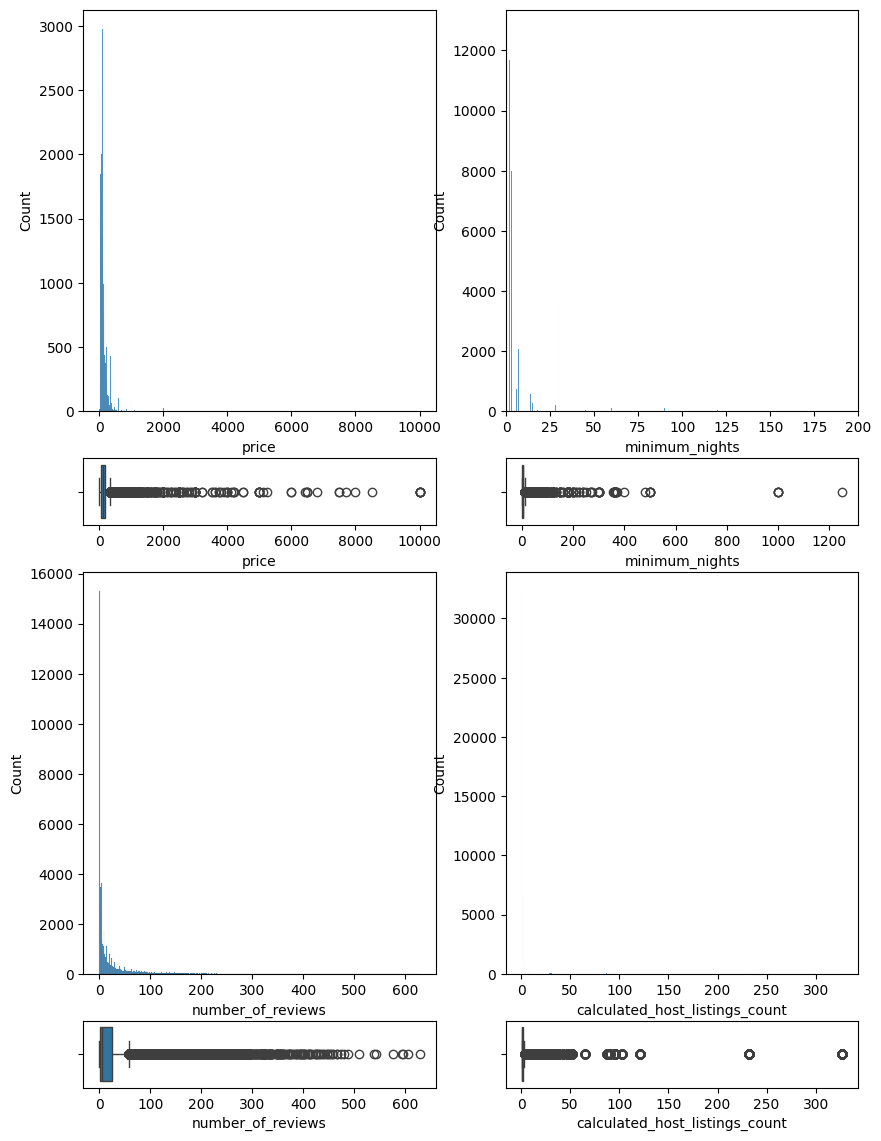

In [12]:
# Variables Numericas: price, minimum_nights, number_of_reviews, calculated_host_listings_count

fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {'height_ratios': [6,1,6,1]})

sns.histplot(ax = axis[0,0], data = data_total, x = "price")
sns.boxplot(ax = axis[1,0], data = data_total, x = "price") 

sns.histplot(ax = axis[0,1], data = data_total, x = "minimum_nights").set_xlim(0, 200)
sns.boxplot(ax = axis[1,1], data = data_total, x = "minimum_nights") 

sns.histplot(ax = axis[2,0], data = data_total, x = "number_of_reviews")
sns.boxplot(ax = axis[3,0], data = data_total, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = data_total, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[3,1], data = data_total, x = "calculated_host_listings_count") 

# Analisis de variables multivariante

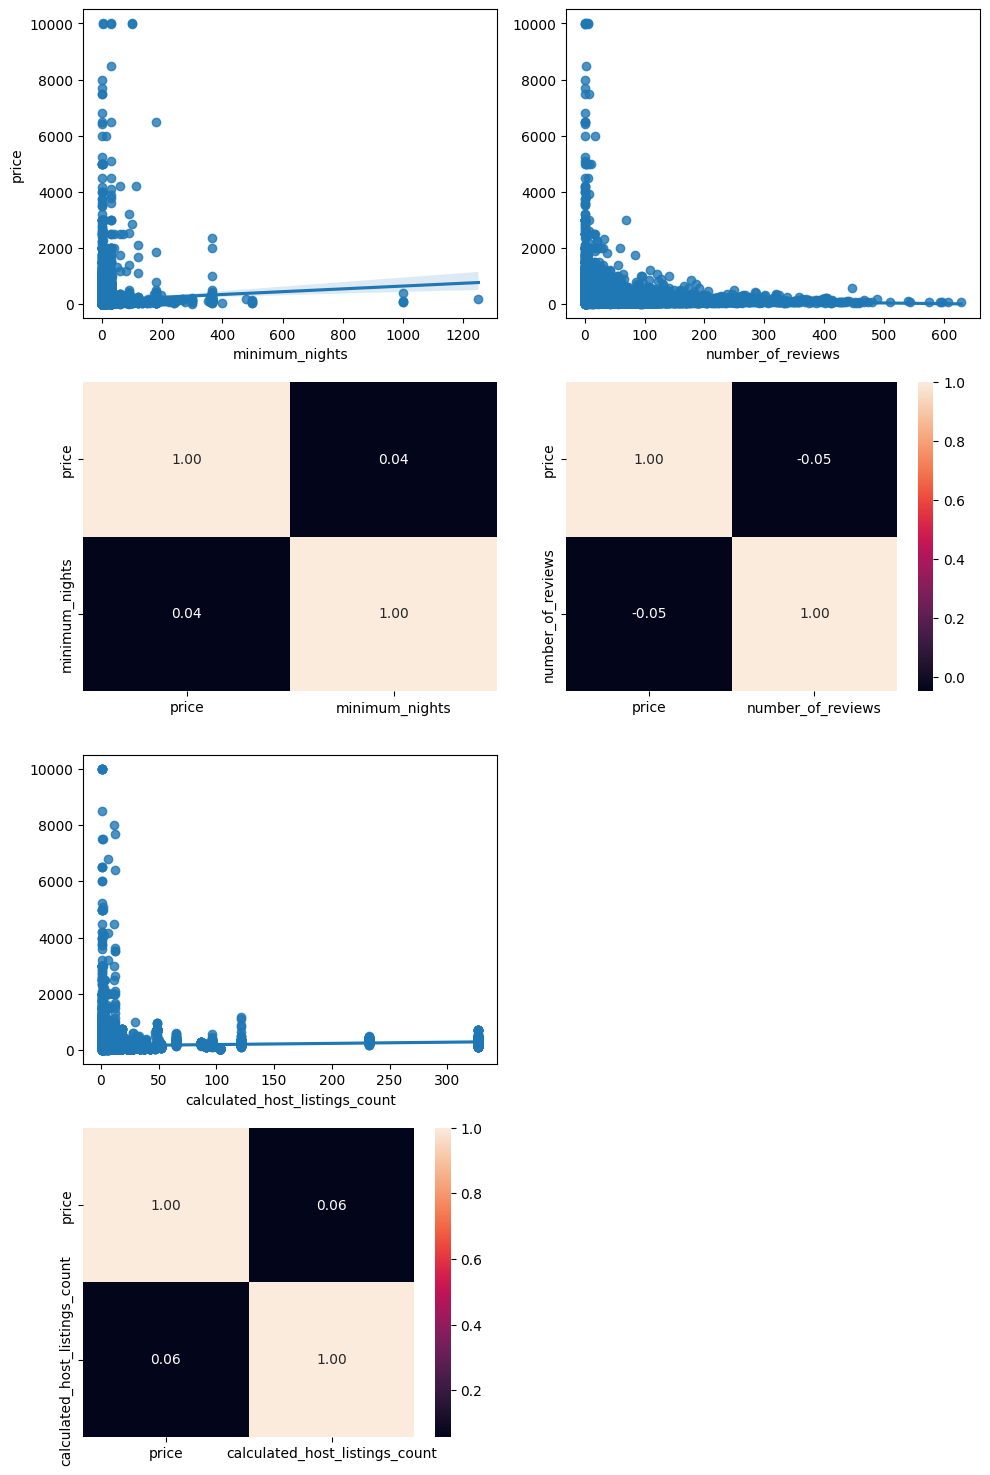

In [13]:
# Numerico - Numerico

fig, axis = plt.subplots(4, 2, figsize = (10, 15))

sns.regplot(ax = axis[0, 0], data = data_total, x = "minimum_nights", y = "price")
sns.heatmap(data_total[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = data_total, x = "number_of_reviews", y = "price").set(ylabel=None)
sns.heatmap(data_total[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = data_total, x = "calculated_host_listings_count", y = "price").set(ylabel=None)
sns.heatmap(data_total[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3,0]).set(ylabel = None)

fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

plt.tight_layout()

plt.show()

- No hay relacion significativa entre el precio y el minimo de noches, ni el numero de reseñas ni con el calculated_host_listings_count

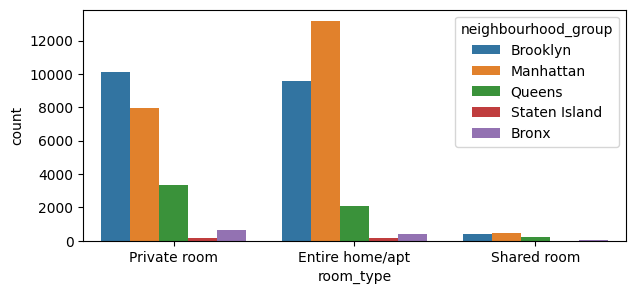

In [14]:
# Categorico - Categorico

# Variables Categoricas: host_id, neighbourhood_group, neighbourhood, room_type, availability_365

fig, axis = plt.subplots(figsize = (7, 3))

sns.countplot(data = data_total, x = "room_type", hue = "neighbourhood_group")

plt.show()



- La mayor cantidad de listados son depratamentos o casa privadas en Manhattan
- En Brooklyn hay un poco mas Habitaciones privadas que casas o deprtamentos privados
- Casi no hay listados en staten island

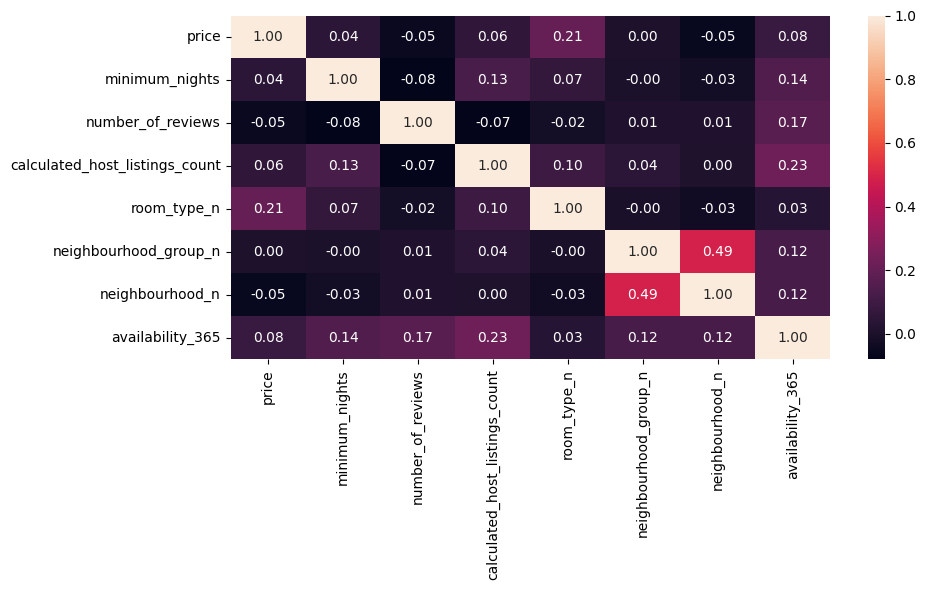

In [15]:
data_total["room_type_n"] = pd.factorize(data_total["room_type"])[0]
data_total["neighbourhood_group_n"] = pd.factorize(data_total["neighbourhood_group"])[0]
data_total["neighbourhood_n"] = pd.factorize(data_total["neighbourhood"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(data_total[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'room_type_n', 'neighbourhood_group_n', 'neighbourhood_n', 'availability_365']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

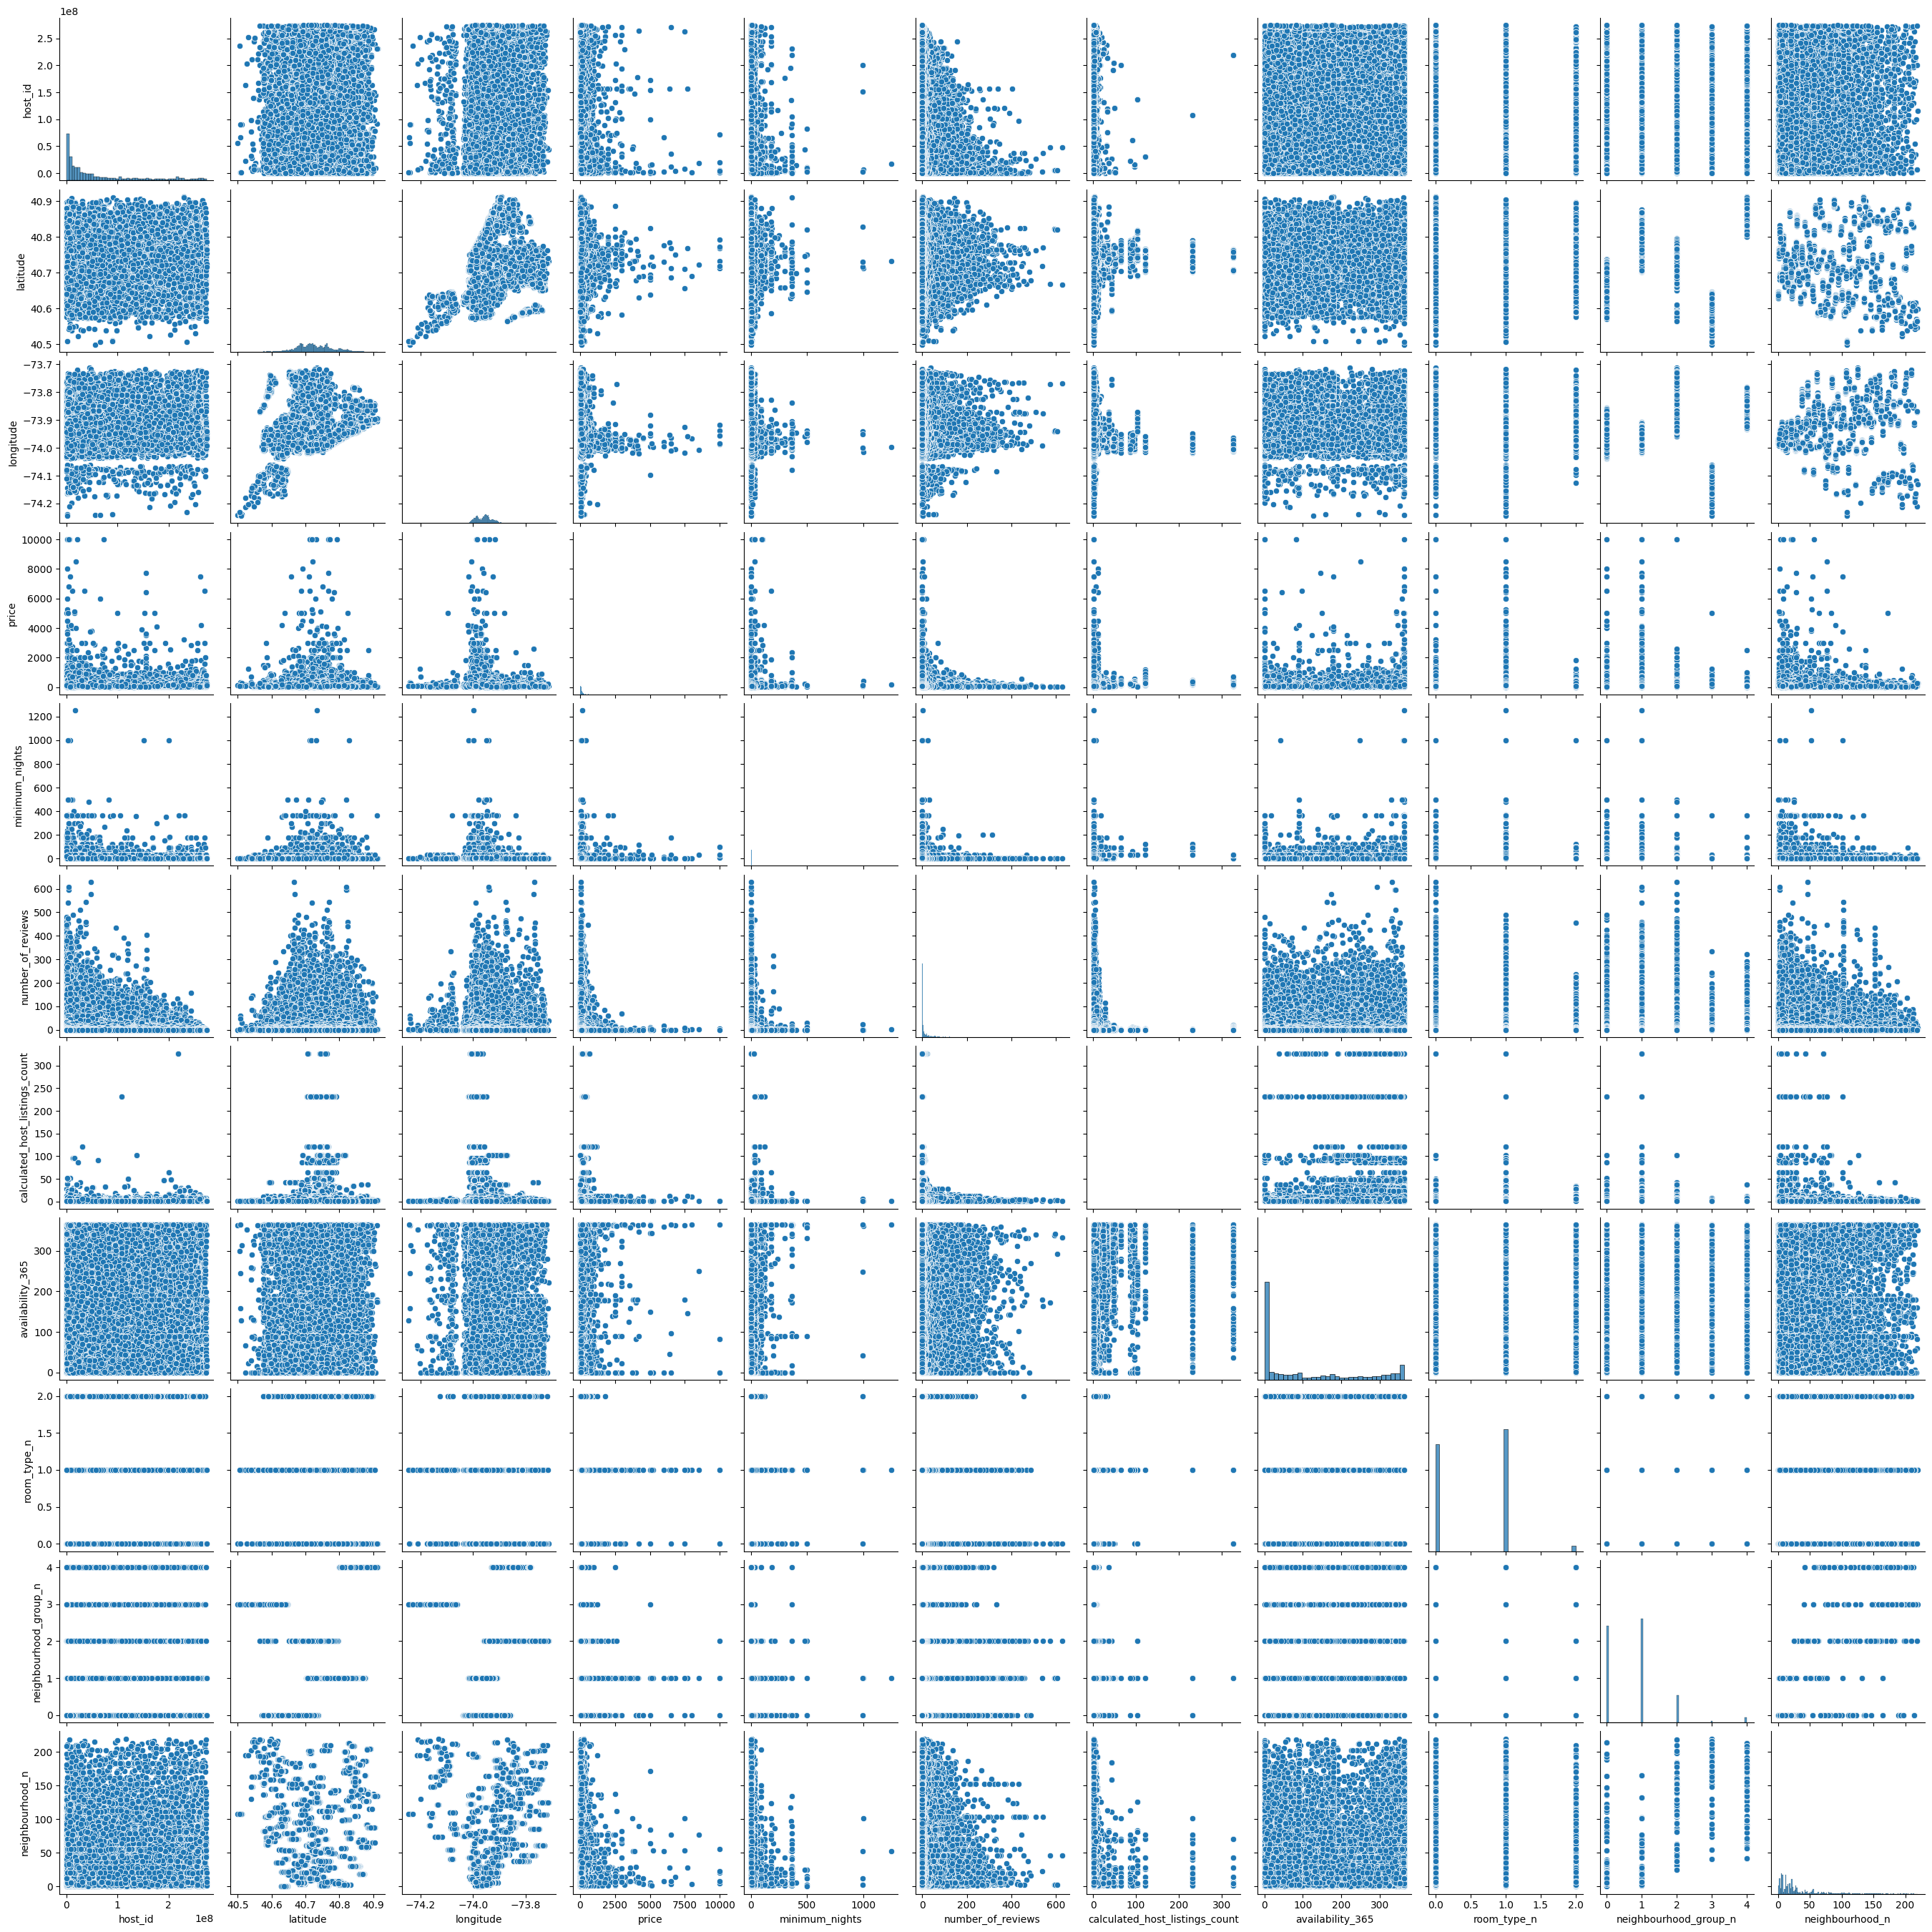

In [16]:
sns.pairplot(data = data_total)

In [17]:
data_total.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_group_n,neighbourhood_n
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327,0.567113,0.786911,29.888782
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289,0.541249,0.844386,34.676634
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.500000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000,1.000000,1.000000,19.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000,1.000000,1.000000,37.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000,2.000000,4.000000,220.000000


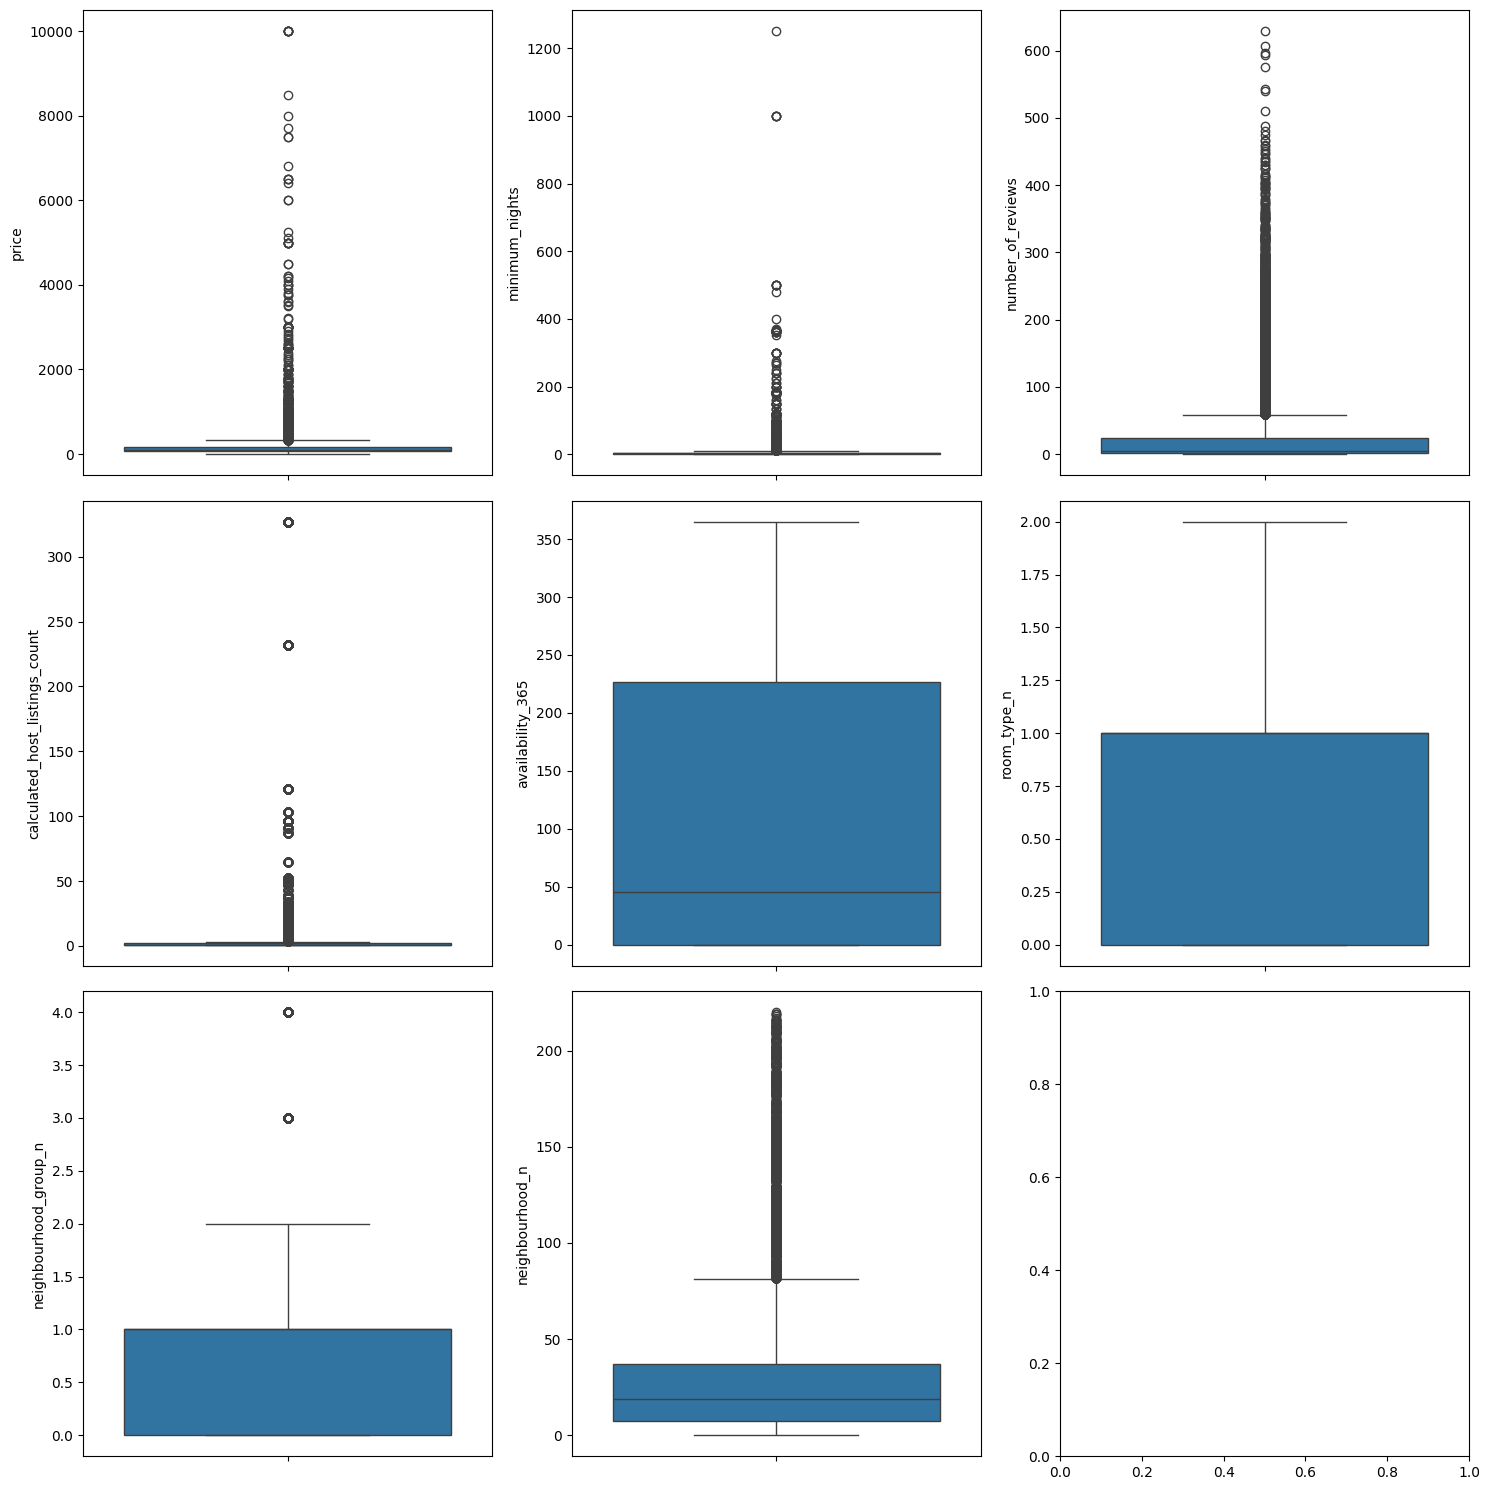

In [18]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))


sns.boxplot(ax = axes[0,0], data = data_total, y = "price")
sns.boxplot(ax = axes[0,1], data = data_total, y = "minimum_nights")
sns.boxplot(ax = axes[0,2], data = data_total, y = "number_of_reviews")
sns.boxplot(ax = axes[1,0], data = data_total, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1,1], data = data_total, y = "availability_365")
sns.boxplot(ax = axes[1,2], data = data_total, y = "room_type_n")
sns.boxplot(ax = axes[2,0], data = data_total, y = "neighbourhood_group_n")
sns.boxplot(ax = axes[2,1], data = data_total, y = "neighbourhood_n")

plt.tight_layout()

plt.show()

In [19]:
price_stats = data_total["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [20]:
price_iqr = price_stats["75%"] - price_stats["25%"]
limite_sup = price_stats["75%"] + 1.5 * price_iqr
limite_inf = price_stats["25%"] - 1.5 * price_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son: {round(limite_sup, 2)} y {round(limite_inf, 2)}, con un rango intecuartilico de {round(price_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son: 334.0 y -90.0, con un rango intecuartilico de 106.0


In [21]:
data_total = data_total[data_total["price"] > 0]

data_total.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_group_n,neighbourhood_n
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,0,0,0
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,1,1,1
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,0,1,2
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,1,0,3
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,1,1,4


In [22]:
nights_stats = data_total["minimum_nights"].describe()
nights_stats

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [23]:
nights_iqr = nights_stats["75%"] - nights_stats["25%"]

limite_sup = nights_stats["75%"] + 1.5 * nights_iqr
limite_inf = nights_stats["25%"] - 1.5 * nights_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son: {round(limite_sup, 2)} y {round(limite_inf, 2)}, con un rango intercuartilico {round(nights_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son: 11.0 y -5.0, con un rango intercuartilico 4.0


In [24]:
data_total = data_total[data_total["minimum_nights"] <= 15]

In [25]:
review_stats = data_total["number_of_reviews"].describe()
review_stats

count    43265.000000
mean        25.211950
std         46.292011
min          0.000000
25%          1.000000
50%          6.000000
75%         27.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [26]:
review_iqr = review_stats["75%"] - review_stats["25%"]

limite_sup = review_stats["75%"] + 1.5 * review_iqr
limite_inf = review_stats["25%"] - 1.5 * review_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son: {round(limite_sup, 2)} y {round(limite_inf, 2)}, con un rango intercuartilico de {round(review_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son: 66.0 y -38.0, con un rango intercuartilico de 26.0


In [27]:
hostlist_stats = data_total["calculated_host_listings_count"].describe()
hostlist_stats

count    43265.000000
mean         3.369305
std         21.721688
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [28]:
hostlist_iqr = hostlist_stats["75%"] - hostlist_stats["25%"]

limite_sup = hostlist_stats["75%"] + 1.5 * hostlist_iqr
limite_inf = hostlist_stats["25%"] - 1.5 * hostlist_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son: {round(limite_sup, 2)} y {round(limite_inf, 2)}, con un rango intercuartilico de {round(hostlist_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son: 3.5 y -0.5, con un rango intercuartilico de 1.0


In [29]:
data_total = data_total[data_total ["calculated_host_listings_count"] > 4]



In [30]:
data_total.isnull().sum().sort_values(ascending = False)

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
room_type_n                       0
neighbourhood_group_n             0
neighbourhood_n                   0
dtype: int64

In [31]:
num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", "availability_365", "neighbourhood_group_n", "room_type_n"]

x = data_total.drop("price", axis=1)[num_variables]
y = data_total['price']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_norm = pd.DataFrame(scaler.fit_transform(x_train), columns=num_variables)
x_test_norm = pd.DataFrame(scaler.transform(x_test), columns=num_variables)

In [53]:
selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(x_train, y_train)
ix = selection_model.get_support()
x_train_sel = pd.DataFrame(selection_model.transform(x_train), columns = x_train.columns.values[ix])
x_test_sel = pd.DataFrame(selection_model.transform(x_test), columns = x_test.columns.values[ix])

x_train_sel.head()

,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group_n,room_type_n
0,1,5,309,0,0
1,2,327,62,1,1
2,2,5,365,2,0
3,7,47,338,1,0
4,2,327,284,1,1


In [55]:
x_train_sel["price"] = list(y_train)
x_test_sel["price"] = list(y_test)
x_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
x_test_sel.to_csv("../data/processed/clean_test.csv", index = False)